# Equação de Bellman

A Equação de Bellman é um conceito fundamental no campo do Aprendizado por Reforço, que é uma abordagem de aprendizado de máquina em que um agente aprende a tomar decisões interativas para maximizar suas recompensas ao interagir com um ambiente. A equação leva o nome do matemático Richard Bellman, que contribuiu significativamente para a teoria dos processos de decisão estocásticos.

A Equação de Bellman no contexto do Aprendizado por Reforço é uma fórmula que expressa como o valor esperado de um estado está relacionado aos valores esperados dos estados futuros, levando em consideração as recompensas imediatas e as possíveis transições de estado. Ela descreve como um agente deve avaliar o valor de um estado com base nas recompensas futuras esperadas, levando em conta as ações que o agente pode escolher.

A formulação básica da Equação de Bellman é a seguinte:

`V(s) = max_a [ R(s, a) + γ * Σ_s' [ P(s' | s, a) * V(s') ] ]`

Onde:

* V(s) é o valor esperado do estado s.
* max_a denota a maximização sobre todas as ações possíveis a no estado s.
* R(s, a) é a recompensa imediata obtida ao executar a ação a no estado s.
* γ é o fator de desconto que pondera as recompensas futuras em relação às recompensas imediatas.
* P(s' | s, a) é a probabilidade de transição para o estado s' a partir do estado s ao executar a ação a.
* V(s') é o valor esperado do estado futuro s'.

Em resumo, a Equação de Bellman é uma ferramenta crucial para avaliar o valor de diferentes estados e guiar as decisões do agente para maximizar suas recompensas ao longo do tempo.

# Importar bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Definir Parâmetros do Jogo

Aqui, definimos os parâmetros básicos do jogo, incluindo o tamanho do grid, o estado inicial do agente, o estado do objetivo (moeda) e a taxa de desconto (gamma) usada na equação de Bellman.

In [2]:
rows = 3 
cols = 4
start_state = (0, 0)
goal_state = (0, 3)
gamma = 0.9

# Inicializar Valores de Estado (V)

Inicializamos uma matriz V de tamanho (rows, cols) com zeros. Essa matriz representa os valores de estado do agente, ou seja, a estimativa de recompensa que o agente espera receber a partir de cada estado.

In [3]:
V = np.zeros((rows, cols))

# Definir Função de Recompensa

Aqui, definimos uma função de recompensa que retorna 10 se o estado for o estado do objetivo (moeda) e -1 caso contrário.

In [4]:
def reward(state):
    if state == goal_state:
        return 10
    else:
        return -1


# Definir Movimentos Possíveis

Criamos uma lista de ações possíveis que o agente pode tomar: mover-se para cima, para baixo, para a esquerda ou para a direita.

In [5]:
actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

# Função para mostrar os valores calculados pela equação de bellman

In [6]:

def plot_values_iteration(V, iteration):
    fig, ax = plt.subplots()
    cax = ax.matshow(V, cmap='viridis')
    fig.colorbar(cax)

    for i in range(rows):
        for j in range(cols):
            ax.text(j, i, f'{V[i, j]:.1f}', va='center', ha='center', fontsize=12, fontweight='bold')

    plt.title(f'Valores Aprendidos - Iteração {iteration}')
    plt.xlabel('Coluna')
    plt.ylabel('Linha')
    plt.xticks(range(cols))
    plt.yticks(range(rows))
    plt.show()


# Função para mostrar uma politica através dos valores calculados da equação de Bellman

In [7]:
def plot_policy_arrows(V):
    fig, ax = plt.subplots()
    cax = ax.matshow(V, cmap='viridis')
    fig.colorbar(cax)

    for i in range(rows):
        for j in range(cols):
            state = (i, j)
            if state == goal_state:
                continue

            max_action = None
            max_value = float("-inf")

            for action in actions:
                new_i = i + action[0]
                new_j = j + action[1]

                if 0 <= new_i < rows and 0 <= new_j < cols:
                    new_state = (new_i, new_j)
                    value = reward(state) + gamma * V[new_state[0], new_state[1]]
                    if value > max_value:
                        max_value = value
                        max_action = action

            if max_action is not None:
                arrow = FancyArrowPatch((j, i), (j + max_action[1] * 0.3, i + max_action[0] * 0.3),
                                        color='red', arrowstyle='->', mutation_scale=15)
                ax.add_patch(arrow)

    plt.title('Política Ótima')
    plt.xlabel('Coluna')
    plt.ylabel('Linha')
    plt.xticks(range(cols))
    plt.yticks(range(rows))
    plt.show()

# Algoritmo de Aprendizado por Reforço

Neste passo, implementamos o algoritmo de aprendizado por reforço usando a equação de Bellman. Realizamos iterações para atualizar os valores de estado (V) com base nas recompensas esperadas.

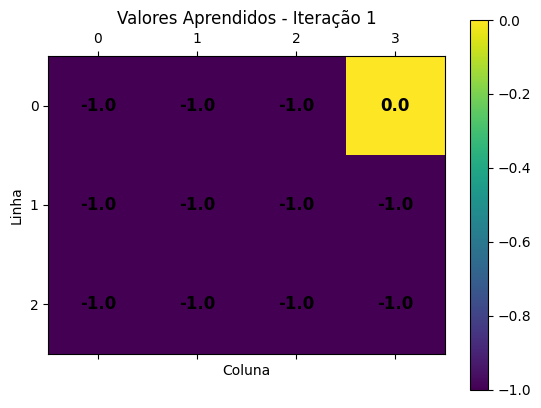

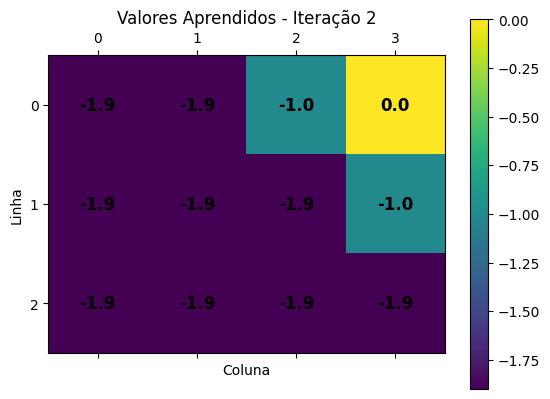

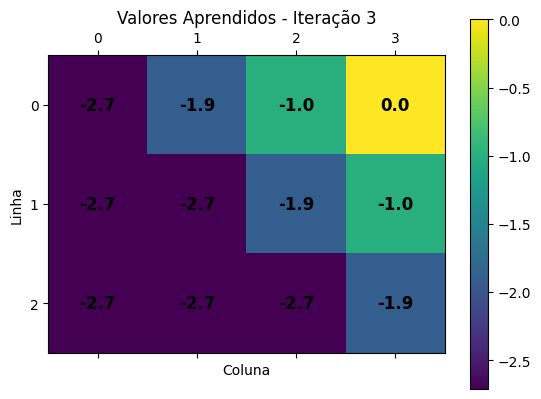

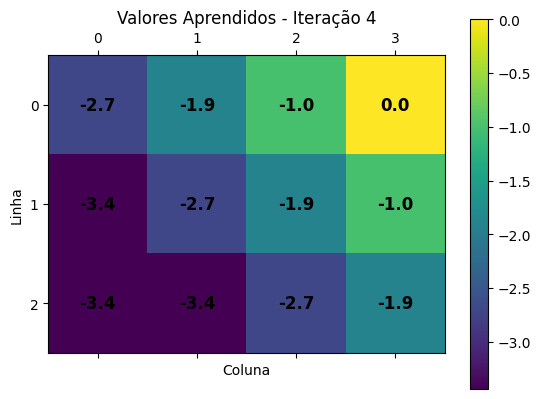

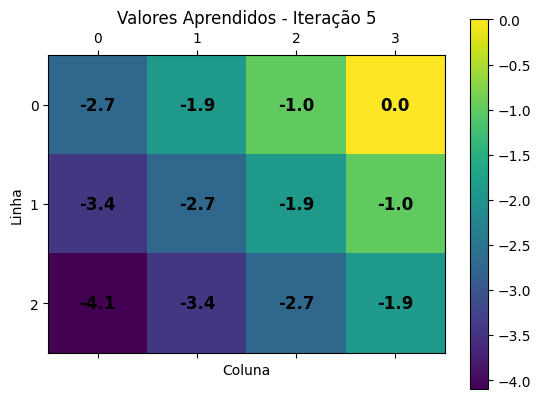

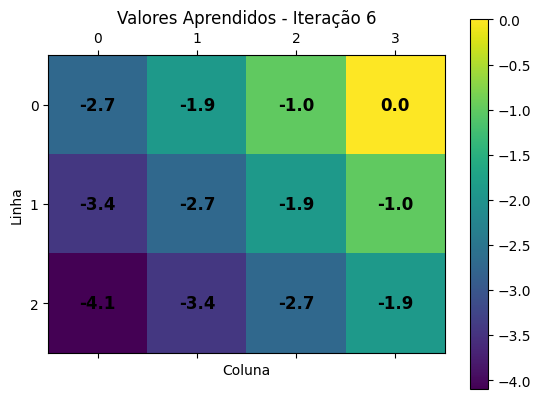

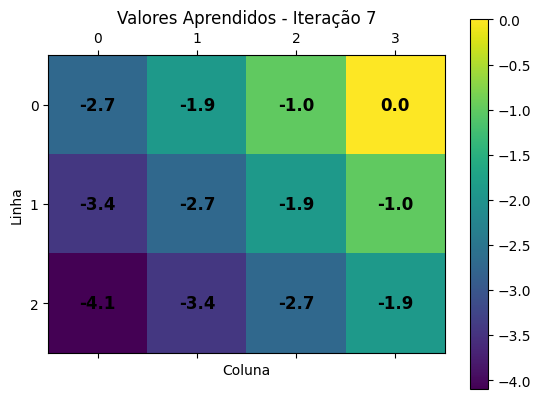

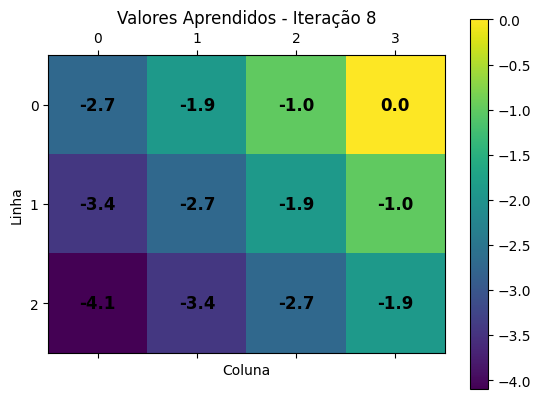

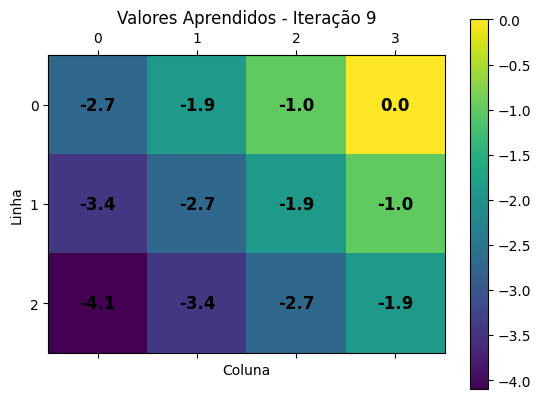

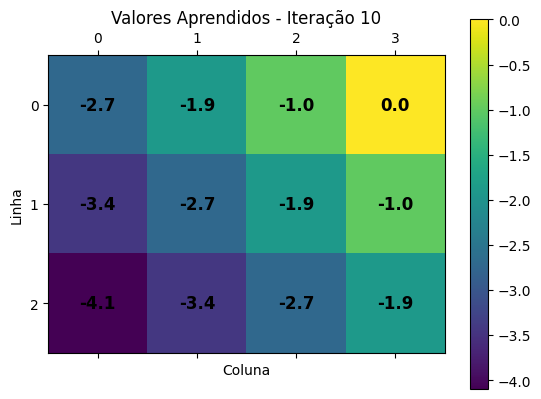

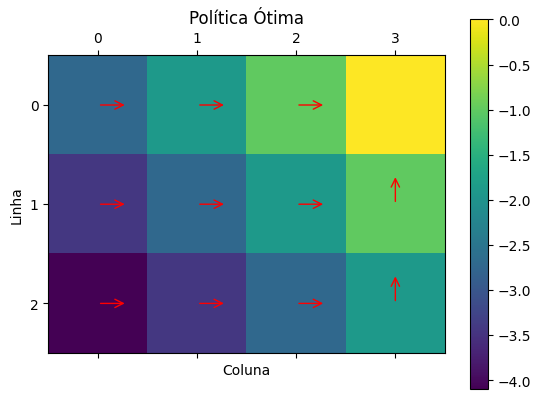

In [8]:

num_iterations = 10  # Número de iterações do algoritmo de aprendizado por reforço

# Loop principal que executa o algoritmo de aprendizado por reforço várias vezes
for iteration  in range(num_iterations):
    new_V = np.copy(V)  # Cria uma cópia dos valores de estado atuais para atualização

    # Loop para percorrer cada posição no grid
    for i in range(rows):
        for j in range(cols):
            state = (i, j)  # Define o estado atual (posição atual no grid)

            # Verifica se o estado atual é o estado do objetivo
            if state == goal_state:
                continue  # Se for, pula para a próxima iteração (não faz nada neste estado)

            max_value = float("-inf")  # Inicializa o valor máximo com um valor negativo infinito

            # Loop para percorrer cada ação possível (movimento) no estado atual
            for action in actions:
                new_i = i + action[0]  # Calcula a nova linha após a ação
                new_j = j + action[1]  # Calcula a nova coluna após a ação

                # Verifica se a nova posição está dentro dos limites do grid
                if 0 <= new_i < rows and 0 <= new_j < cols:
                    new_state = (new_i, new_j)  # Define o novo estado após a ação
                    value = reward(state) + gamma * V[new_state[0], new_state[1]]
                    # Calcula o valor atualizado do estado usando a equação de Bellman
                    # (recompensa imediata + fator de desconto * valor do novo estado)
                    max_value = max(max_value, value)  # Mantém o valor máximo encontrado

            new_V[i, j] = max_value  # Atualiza o valor do estado atual na nova matriz de valores

    V = new_V  # Atualiza a matriz de valores de estado com os novos valores calculados
    plot_values_iteration(V, iteration + 1)

plot_policy_arrows(V)